In [2]:
import numpy as np 
from os import listdir
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

# NLP 

# Préparation des données pour la vectorisation
Les mots doivent être convertis en vecteurs, en fonction de l'utilisation que l'on souhaite, la vectorisation peut être différentes.
Par exemple si on souhaite travailler sur des données textuelles, exemple tweet, critiques etc..., il faudra convertir les données textuelles en chiffres.

# TF-IDF
Le TF-IDF est une statistique numérique destinée à refléter l'importance d'un mot pour un document dans une collection ou un corpus.
Elle est souvent utilisée comme facteur de pondération dans les recherches d'information, l'exploration de texte et la modélisation de l'utilisateur. 
83% des systèmes de recommandation basés sur le texte dans le domaine des bibliothèques numériques utilisent tf-idf.
L'une des fonctions de classement les plus simples est calculée en additionnant les tf-idf pour chaque terme de la requête ; de nombreuses fonctions de classement plus sophistiquées sont des variantes de ce modèle simple.

In [3]:
data = ""
for f in listdir('bootstrap/discours/tous'):
   data += open('bootstrap/discours/tous/' + f).read()

data = data.split("\n")[1:-1]

In [4]:
#punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = set(stopwords.words('french'))

vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(data)

In [5]:
word_features = vectorizer.get_feature_names_out()
print(len(word_features))
print(word_features[5000:5100])

21506
['conservatisme' 'conservatismes' 'conservatoires' 'conservatrice'
 'conserve' 'conservent' 'conserver' 'conserves' 'conservé' 'considère'
 'considèrent' 'considérable' 'considérablement' 'considérables'
 'considéraient' 'considérais' 'considérait' 'considérant' 'considération'
 'considérations' 'considérer' 'considérera' 'considéreront' 'considérez'
 'considérions' 'considérons' 'considéré' 'considérée' 'considérées'
 'considérés' 'consigne' 'consignes' 'consistait' 'consistant' 'consiste'
 'consistent' 'consister' 'consistera' 'consisterait' 'consisté' 'console'
 'consoler' 'consolidation' 'consolident' 'consolider' 'consolidée'
 'consommateur' 'consommateurs' 'consommation' 'consomme' 'consomment'
 'consommer' 'consommons' 'conspué' 'constamment' 'constance' 'constant'
 'constante' 'constants' 'constat' 'constatant' 'constate' 'constatent'
 'constater' 'constatons' 'constats' 'constaté' 'constatée' 'constituant'
 'constituante' 'constitue' 'constituent' 'constituer' 'constitue

# Stemming
Le stemming est le processus qui consiste à réduire un mot à sa racine, c'est-à-dire à son radical. La forme racine n'est pas nécessairement un mot en soi, mais elle peut être utilisée pour générer des mots en concaténant le bon suffixe.

# Tokenisation
La tokenisation consiste à décomposer la phrase en mots et en ponctuation,

In [6]:
stemmer = SnowballStemmer(language='french')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

# Vectorisation avec suppression des stop words, puis stemming et tokenisation 

In [7]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(data)
word_features2 = vectorizer2.get_feature_names_out()
print(len(word_features2))
print(word_features2[:50]) 

/home/logan/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'f', 'fuss', 'fussion', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'taient', 'tais', 'tait', 'tant', 'ti', 'tion', 'votr'] not in stop_words.
  warnings.warn(


11048
["'" "'a" "'acquisit" "'ai" "'argent" "'audiovisuel" "'autr" "'av"
 "'emploi" "'en" "'entr" "'etat" "'europ" "'il" "'illustr" "'individual"
 "'insinu" "'on" "'organis" "'un" 'a' 'ab' 'abaiss' 'abaissement'
 'abaissent' 'abandon' 'abandonnent' 'abatt' 'abatton' 'abattr' 'abattu'
 'abb' 'abdiqu' 'abelin' 'aberr' 'abil' 'abim' 'abject' 'able' 'abol'
 'abolit' 'abon' 'abond' 'abord' 'abordent' 'about' 'abr' 'abreuv' 'abri'
 'abribus']


In [8]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(data)
words = vectorizer3.get_feature_names_out()

# K-means clustering
(Source [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm) )

# Méthode Elbow pour sélectionner le nombre de clusters 
Cette méthode examine le pourcentage de variance expliquée en fonction du nombre de clusters : On devrait choisir un nombre de clusters tel que l'ajout d'un autre cluster ne donne pas une bien meilleure modélisation des données. Plus précisément, si l'on trace le pourcentage de variance expliquée par les clusters en fonction du nombre de clusters, les premiers clusters ajouteront beaucoup d'information (expliqueront beaucoup de variance), mais à un certain point le gain marginal diminuera, donnant un angle dans le graphique.

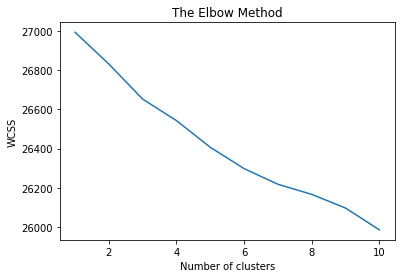

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [10]:
print(words[250:300])

['devr' 'di' 'dialogu' 'diat' 'diff' 'difficil' 'difficult' 'dign'
 'dimanch' 'diminu' 'dir' 'direct' 'dirig' 'dis' 'discour' 'disent'
 'distribu' 'dit' 'divers' 'divis' 'dix' 'doit' 'doivent' 'domain' 'don'
 'donc' 'dont' 'dout' 'drapeau' 'droit' 'ducat' 'duir' 'dur' 'e' 'effet'
 'efficac' 'effort' 'eh' 'ellement' 'embauch' 'emp' 'emploi' 'emplois'
 'encor' 'encourag' 'enfant' 'enfin' 'engag' 'enjeu' 'enne']


# 2 Clusters

In [15]:
kmeans = KMeans(n_clusters = 2, n_init = 20)
kmeans.fit(X3)
# We look at 2 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

Y = vectorizer3.transform(["cette politique sans république"])
prediction = kmeans.predict(Y)
print(prediction)

0 : r, a, dan, e, plus, franc, c'est, tout, pr, re, cet, tre, pay, cel, si, comm, parc, fair, tous, bien, polit, fait, notr, auss, l'
1 : ais, fran, r, dan, franc, c'est, a, tous, peupl, tre, e, plus, veux, pr, tout, cet, si, parc, publiqu, fair, dir, qu'il, l', cel, re
[0]


# 3 Clusters

In [11]:
kmeans = KMeans(n_clusters = 3, n_init = 20) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

Y = vectorizer3.transform(["cette politique sans république"])
prediction = kmeans.predict(Y)
print(prediction)

0 : dan, e, plus, franc, c'est, tout, re, pr, cet, tre, pay, cel, si, comm, fair, tous, ceux, polit, auss, notr, parc, l', veux, qu'il, fait
1 : r, a, publiqu, dan, e, plus, franc, tout, pr, re, c'est, cet, bien, tre, fait, parc, pay, cel, si, comm, qu'il, droit, grand, tous, fair
2 : ais, fran, r, dan, franc, c'est, a, tous, peupl, tre, e, plus, veux, pr, tout, cet, si, parc, publiqu, dir, fair, qu'il, l', cel, re
[1]


# 5 Clusters

In [12]:
kmeans = KMeans(n_clusters = 5, n_init = 20)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : dan, e, franc, c'est, tout, re, pr, cet, tre, cel, comm, si, pay, tous, fair, polit, auss, ceux, notr, l', parc, veux, fait, bien, droit
1 : r, publiqu, e, dan, pr, franc, c'est, form, tout, cet, int, bien, re, alit, cel, tre, gion, sident, si, tous, notr, ser, l', polit, grand
2 : a, dan, e, franc, r, fait, tout, re, cet, parc, an, pay, droit, c'est, qu'il, n'y, bien, tre, si, dir, pr, gauch, comm, dit, cel
3 : plus, e, dan, r, a, c'est, franc, pay, qu'il, grand, pr, tre, re, parc, tout, ser, cet, ceux, si, fair, cel, rien, o, fort, an
4 : ais, fran, r, dan, franc, c'est, tous, peupl, tre, e, a, veux, pr, tout, cet, plus, si, parc, fair, publiqu, dir, qu'il, l', cel, re


# 6 Clusters

In [13]:
kmeans = KMeans(n_clusters = 6, n_init = 20)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : dan, plus, c'est, tout, pr, re, cet, tre, pay, cel, comm, si, fair, tous, polit, ceux, auss, notr, l', parc, qu'il, fait, droit, social, bien
1 : r, publiqu, dan, pr, plus, form, int, c'est, tout, bien, alit, cet, gion, cel, re, sident, tre, tous, grand, polit, l', si, ser, notr, social
2 : a, dan, plus, fait, r, tout, qu'il, parc, n'y, an, re, cet, bien, c'est, gauch, droit, si, pay, tre, dir, dit, comm, quand, cel, pr
3 : e, ann, dan, id, r, plus, re, cet, tout, a, tre, pr, c'est, comm, depuis, si, pay, cel, bien, g, grand, ser, polit, national, dern
4 : ais, fran, r, dan, c'est, tous, peupl, tre, franc, plus, a, veux, pr, tout, e, cet, si, parc, fair, publiqu, dir, qu'il, l', cel, re
5 : franc, c'est, r, dan, a, veux, plus, e, cet, tout, pay, pr, parc, viv, cel, re, tre, mond, o, notr, si, tous, sident, fair, auss


# 8 Clusters

In [14]:
kmeans = KMeans(n_clusters = 8, n_init = 20)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : plus, franc, c'est, tout, re, tre, cel, cet, polit, si, fair, pay, comm, auss, parc, notr, fait, social, droit, veux, l', autr, qu'il, bien, faut
1 : r, publiqu, form, c'est, franc, int, plus, alit, tout, bien, cel, gion, re, cet, grand, tre, gle, notr, tous, polit, social, parc, si, l', fair
2 : ais, fran, r, franc, c'est, dan, tous, peupl, tre, plus, a, veux, e, tout, cet, pr, si, parc, fair, publiqu, qu'il, dir, l', cel, re
3 : ceux, tous, plus, r, dan, cel, veulent, tout, a, qu'il, vot, franc, comm, cet, bien, e, c'est, part, re, dir, auss, pr, fair, tre, vi
4 : pr, sident, sidentiel, r, lection, sent, c'est, publiqu, plus, franc, cet, dan, tout, si, tre, l', e, re, a, ser, comm, veux, car, fair, f
5 : e, ann, id, r, plus, re, franc, dan, a, cet, tout, c'est, tre, comm, depuis, si, ser, g, pay, grand, cel, polit, bien, parc, veux
6 : dan, pay, cet, plus, r, tout, notr, mond, c'est, franc, re, a, comm, o, l', si, grand, entrepris, auss, cel, fair, tre, tous, vi, parc
7 : a, plus